# Example of high-level interface

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cuda:0'

## Toy generative model

In [3]:
def model(z, sigma = .03):
    T = np.array([[1, 1.], [0, 1.], [0, 1.]])
    n = np.random.randn(3)*sigma
    x = T.dot(z) + n
    return x

## Mock data generation

In [4]:
z0 = np.array([0.4, 0.6])
x0 = model(z0)
print(x0, z0)

[1.00684819 0.63080671 0.57481245] [0.4 0.6]


## Automatic inference 1-dim and 2-dim posteriors

In [5]:
sw = swyft.SWYFT(x0, model, zdim = 2, device = DEVICE)

In [8]:
sw.run(nrounds = 2, max_epochs=10)

Constrained posterior volume: 0.17093901234567901
Normalizations
x_mean tensor([1.0057, 0.6012, 0.6013])
x_err tensor([0.1774, 0.1067, 0.1056])
z_mean tensor([0.4039, 0.6013])
z_err tensor([0.1398, 0.1018])
Epoch: 0 []
Epoch: 1 [2.610310244373977]
Epoch: 2 [2.610310244373977, 2.6119793523103]
Epoch: 3 [2.610310244373977, 2.6119793523103, 2.6115959864109755]
Epoch: 4 [2.610310244373977, 2.6119793523103, 2.6115959864109755, 2.6099214693531394]
Epoch: 5 [2.610310244373977, 2.6119793523103, 2.6115959864109755, 2.6099214693531394, 2.6017147433012724]
Epoch: 6 [2.610310244373977, 2.6119793523103, 2.6115959864109755, 2.6099214693531394, 2.6017147433012724, 2.599385028705001]
Epoch: 7 [2.610310244373977, 2.6119793523103, 2.6115959864109755, 2.6099214693531394, 2.6017147433012724, 2.599385028705001, 2.6038206163793802]
Epoch: 8 [2.610310244373977, 2.6119793523103, 2.6115959864109755, 2.6099214693531394, 2.6017147433012724, 2.599385028705001, 2.6038206163793802, 2.6033770348876715]
Epoch: 9 [2.6

/home/bmiller/swyft/swyft/core.py:228: UserWarning: Training finished by reaching max_epochs == 10.
  


Constrained posterior volume: 0.13043333333333335
Normalizations
x_mean tensor([1.0095, 0.6098, 0.6097])
x_err tensor([0.1573, 0.0933, 0.0929])
z_mean tensor([0.4001, 0.6098])
z_err tensor([0.1246, 0.0887])
Epoch: 0 []
Epoch: 1 [3.328023299574852]
Epoch: 2 [3.328023299574852, 3.3418196626007557]
Epoch: 3 [3.328023299574852, 3.3418196626007557, 3.3618724793195724]
Epoch: 4 [3.328023299574852, 3.3418196626007557, 3.3618724793195724, 3.3598684184253216]
Epoch: 5 [3.328023299574852, 3.3418196626007557, 3.3618724793195724, 3.3598684184253216, 3.375442860648036]
Epoch: 6 [3.328023299574852, 3.3418196626007557, 3.3618724793195724, 3.3598684184253216, 3.375442860648036, 3.387379063293338]
Epoch: 7 [3.328023299574852, 3.3418196626007557, 3.3618724793195724, 3.3598684184253216, 3.375442860648036, 3.387379063293338, 3.407090026885271]
Epoch: 8 [3.328023299574852, 3.3418196626007557, 3.3618724793195724, 3.3598684184253216, 3.375442860648036, 3.387379063293338, 3.407090026885271, 3.4410935062915087

In [9]:
sw.comb([[0, 1]], max_epochs=10)

Normalizations
x_mean tensor([1.0095, 0.6098, 0.6097])
x_err tensor([0.1573, 0.0933, 0.0929])
z_mean tensor([0.4001, 0.6098])
z_err tensor([0.1246, 0.0887])
Epoch: 0 []
Epoch: 1 [1.0475524147041142]
Epoch: 2 [1.0475524147041142, 0.811538378125988]
Epoch: 3 [1.0475524147041142, 0.811538378125988, 0.8870537865441293]
Epoch: 4 [1.0475524147041142, 0.811538378125988, 0.8870537865441293, 0.8930826373398304]
Epoch: 5 [1.0475524147041142, 0.811538378125988, 0.8870537865441293, 0.8930826373398304, 0.8392364730825648]
Epoch: 6 [1.0475524147041142, 0.811538378125988, 0.8870537865441293, 0.8930826373398304, 0.8392364730825648, 0.8453050015959889]
Epoch: 7 [1.0475524147041142, 0.811538378125988, 0.8870537865441293, 0.8930826373398304, 0.8392364730825648, 0.8453050015959889, 0.8211000611772761]
Epoch: 8 [1.0475524147041142, 0.811538378125988, 0.8870537865441293, 0.8930826373398304, 0.8392364730825648, 0.8453050015959889, 0.8211000611772761, 0.8126232295762748]
Epoch: 9 [1.0475524147041142, 0.811538

## Plot posteriors

0.9999999
1.0


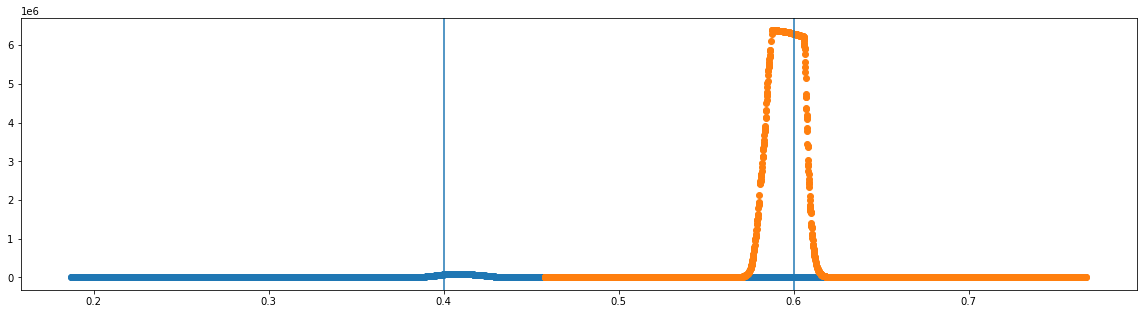

In [10]:
plt.figure(figsize=(20, 5))
for i in range(2):
    zgrid, lnLgrid = sw.posterior(i)
    plt.axvline(z0[i])
    plt.scatter(zgrid[:], np.exp(lnLgrid[:]))
    
    # Print integral
    x = zgrid
#     y = np.exp(lnLgrid)
    y = lnLgrid
    ii = np.argsort(x)
    I = np.trapz(y[ii], x[ii])
    print(I)

(0.0, 1.0)

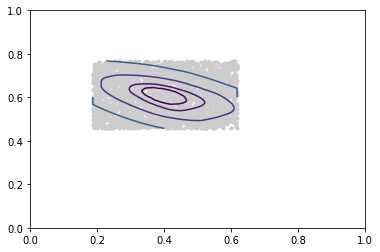

In [11]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9, 16, 50])
plt.xlim([0, 1])
plt.ylim([0, 1])